In [1]:
#download necessary packages
%pip install pandas geopandas matplotlib rioxarray xarray

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from glob import glob

In [3]:
#Read data
df2016 = pd.read_csv('2016.csv')
df2021 = pd.read_csv('2021.csv')

In [132]:
df_2016

,DAUID,DA name,Population,English Only,French Only,English and French,Neither,Work language: English,Work language: French,Non-immigrants,Immigrants
0,2466,0,1942044,220425.0,517445.0,1131680.0,45205.0,292300.0,609070.0,1187260.0,644685.0
1,24660001,1,657,0.0,325.0,260.0,5.0,0.0,345.0,570.0,35.0
2,24660002,2,534,0.0,275.0,240.0,5.0,15.0,250.0,395.0,70.0
3,24660003,3,303,0.0,165.0,135.0,0.0,10.0,155.0,320.0,0.0
4,24660004,4,283,0.0,150.0,125.0,5.0,0.0,200.0,280.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3198,24663445,3445,1469,110.0,175.0,1175.0,10.0,345.0,700.0,990.0,430.0
3199,24663450,3450,491,25.0,105.0,350.0,10.0,75.0,190.0,255.0,165.0
3200,24663451,3451,428,20.0,95.0,305.0,10.0,55.0,225.0,360.0,75.0
3201,24663452,3452,1602,450.0,80.0,1010.0,60.0,400.0,400.0,625.0,675.0


In [70]:
#modify headers and separaters
my_sep = ","
my_headers2016 = ["DAUID",
"DA name",
"Population",
"English Only",
"French Only",
"English and French",
"Neither",
"Work language: English",
"Work language: French",
"Non-immigrants",
"Immigrants"]

df_2016 = pd.read_csv("2016.csv", sep = my_sep, header = 0, names = my_headers)
df_2021 = pd.read_csv("2021.csv", sep = my_sep, header = 0, names = my_headers)

In [71]:
gdf_da2016 = gpd.read_file('2016.shp')
gdf_da2021 = gpd.read_file('2021.shp')

In [72]:
#convert geodatabase DAUID to a number value

to_convert = {'DAUID': 'int64'}
gdf_da2016 = gdf_da2016.astype(to_convert)
gdf_da2021 = gdf_da2021.astype(to_convert)

In [107]:
## potentially not needed ###

#####gdf_da_mtl2016 = gdf_da2016.loc[(gdf_da2016['DAUID'] >= 24661006) & (gdf_da2016['DAUID'] <= 24663453)]
########gdf_da_mtl2021 = gdf_da2021.loc[(gdf_da2021['DAUID'] >= 24661006) & (gdf_da2021['DAUID'] <= 24663497)]

In [115]:
#creating merged dataframes
merged_gdf2016 = pd.merge(gdf_da2016, df_2016)
merged_gdf2021 = pd.merge(gdf_da2021, df_2021)

In [116]:
#resizing 
proj_merged_gdf2016 = merged_gdf2016.to_crs('EPSG:2950')
proj_merged_gdf2021 = merged_gdf2021.to_crs('EPSG:2950')

In [17]:
#create new data columns
proj_merged_gdf2016['percEng']= round(((proj_merged_gdf2016['English Only']/proj_merged_gdf2016['Population'])),2)

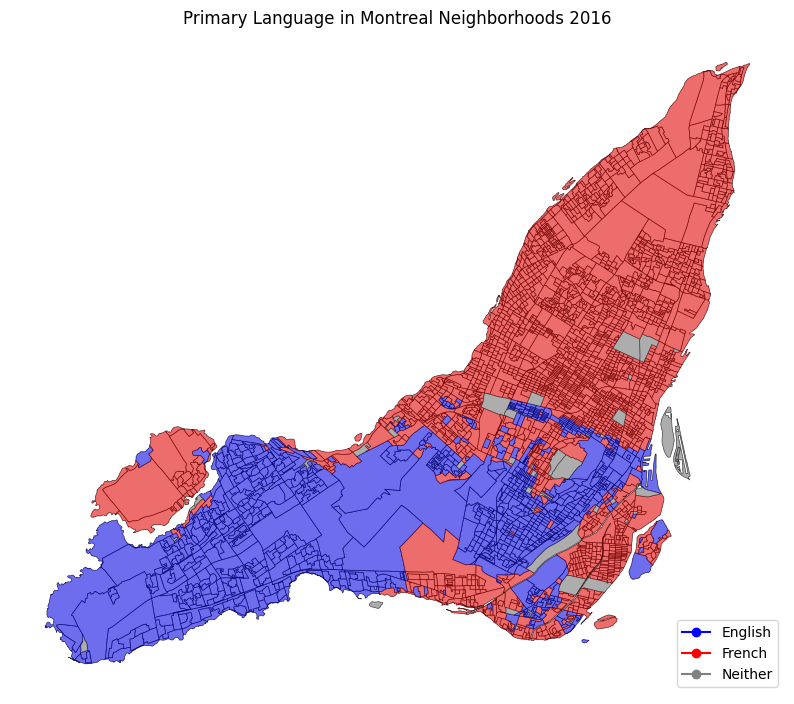

In [117]:
### 2016 Language Distribution Map###

proj_merged_gdf2016['Language'] = 'Neither'
proj_merged_gdf2016.loc[proj_merged_gdf2016['English Only'] > proj_merged_gdf2016['French Only'], 'Language'] = 'English'
proj_merged_gdf2016.loc[proj_merged_gdf2016['French Only'] > proj_merged_gdf2016['English Only'], 'Language'] = 'French'

#plot the map
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2016.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

# Color Dictionary
colors = {'English': 'blue', 'French': 'red', 'Neither': 'gray'}

# Plot the language categories on top of the neighborhoods map
for lang, color in colors.items():
    proj_merged_gdf2016[proj_merged_gdf2016['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )

# Set the title and axis labels
ax.set_title('Primary Language in Montreal Neighborhoods 2016')
ax.set_axis_off()

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

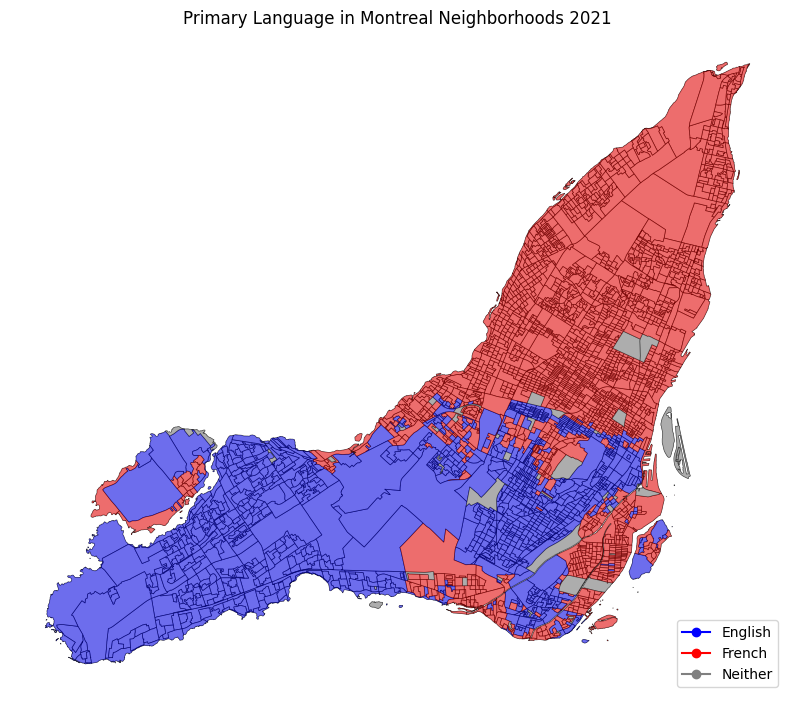

In [118]:
### 2021 Language Distribution Map ###

proj_merged_gdf2021['Language'] = 'Neither'
proj_merged_gdf2021.loc[proj_merged_gdf2021['English Only'] > proj_merged_gdf2021['French Only'], 'Language'] = 'English'
proj_merged_gdf2021.loc[proj_merged_gdf2021['French Only'] > proj_merged_gdf2021['English Only'], 'Language'] = 'French'

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

# Create a dictionary of colors for the language categories
colors = {'English': 'blue', 'French': 'red', 'Neither': 'gray'}

# Plot the language categories on top of the neighborhoods map
for lang, color in colors.items():
    proj_merged_gdf2021[proj_merged_gdf2021['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )
#axis and legend
ax.set_title('Primary Language in Montreal Neighborhoods 2021')
ax.set_axis_off()
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

In [119]:
def dif_calc(gdf1, gdf2):
    # Calculate the total number of English and French speakers
    gdf1_english_speakers = gdf1['English Only'].sum()
    gdf2_english_speakers = gdf2['English Only'].sum()
    gdf1_french_speakers = gdf1['French Only'].sum()
    gdf2_french_speakers = gdf2['French Only'].sum()
    
    # Calculate the percentage difference in English and French speakers
    english_percentage_difference = ((gdf2_english_speakers - gdf1_english_speakers) / gdf1_english_speakers) * 100
    french_percentage_difference = ((gdf2_french_speakers - gdf1_french_speakers) / gdf1_french_speakers) * 100
    
    # store the results
    results = {
        'English Percentage Difference': english_percentage_difference,
        'French Percentage Difference': french_percentage_difference
    }
    
    return results

In [120]:
# Call the function to calculate the percentage difference
percentage_difference = dif_calc(proj_merged_gdf2016, proj_merged_gdf2021)

# Print the results
print(percentage_difference)


{'English Percentage Difference': 19.049131243478655, 'French Percentage Difference': -5.783908757605951}


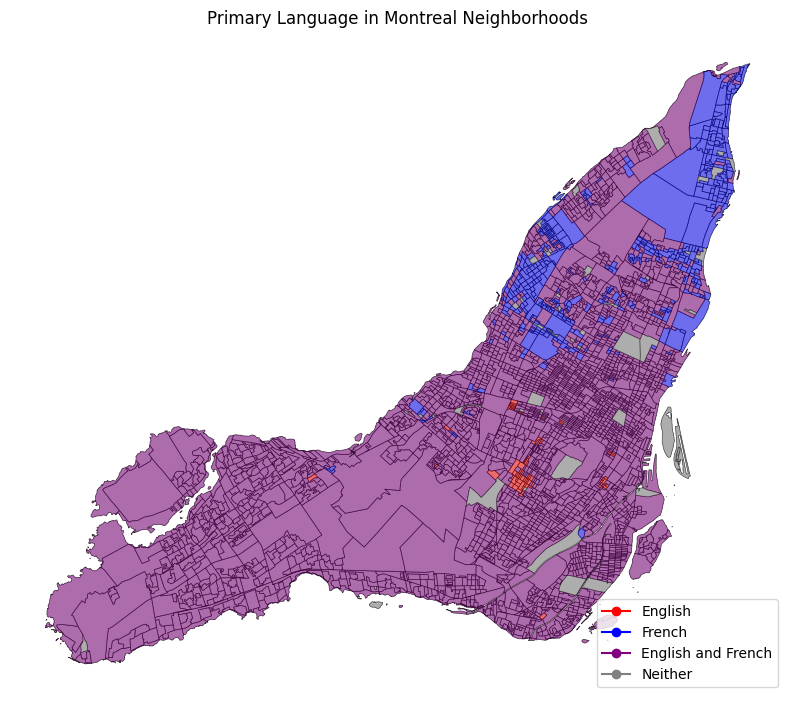

In [128]:
### most common language spoken at home ###

proj_merged_gdf2021['Language'] = 'Neither'
proj_merged_gdf2021.loc[(proj_merged_gdf2021['English Only'] > proj_merged_gdf2021[['French Only', 'English and French']].max(axis=1)), 'Language'] = 'English'
proj_merged_gdf2021.loc[(proj_merged_gdf2021['French Only'] > proj_merged_gdf2021[['English Only', 'English and French']].max(axis=1)), 'Language'] = 'French'
proj_merged_gdf2021.loc[(proj_merged_gdf2021['English and French'] > proj_merged_gdf2021[['French Only', 'English Only']].max(axis=1)), 'Language'] = 'English and French'

fig, ax = plt.subplots(figsize=(10, 10))
proj_merged_gdf2021.plot(
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    facecolor='lightgray',
    ax=ax
)

# Color Dictionary
colors = {'English': 'red', 'French': 'blue', 'English and French': 'purple', 'Neither': 'gray'}

# Plot the language categories on top of the neighborhoods map
for lang, color in colors.items():
    proj_merged_gdf2021[proj_merged_gdf2021['Language'] == lang].plot(
        color=color,
        alpha=0.5,
        ax=ax
    )

# Set the title and axis labels
ax.set_title('Primary Language in Montreal Neighborhoods')
ax.set_axis_off()

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=lang) for lang, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower right')